In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
pd.set_option("display.max_rows", 250)

In [ ]:
df_questions = pd.read_csv("./data/gold/panel_data_questions_Ym_v02070302.csv")
df_meetings = pd.read_csv("./data/gold/panel_data_meetings_Ym_v02070202.csv")


df_meps = pd.read_csv("./data/gold/panel_data_meps_Ym_v020702.csv")
df_meps.columns = [f"meps_{c}" if c not in ["member_id", "Y-m", "date"] else c for c in df_meps.columns ]
POLITICAL_GROUP_COLUMNS = [c for c in df_meps.columns if 'meps_POLITICAL_GROUP' in c]
COUNTRY_COLUMNS = [c for c in df_meps.columns if 'meps_COUNTRY' in c]

df_meps["meps_party"] = df_meps[POLITICAL_GROUP_COLUMNS].idxmax(axis=1)
df_meps["meps_country"] = df_meps[COUNTRY_COLUMNS].idxmax(axis=1)



In [64]:
all_mepss = set(df_questions['member_id'].unique()) | set(df_meetings['member_id'].unique()) | set(df_meps['member_id'].unique())
all_months =  set(df_questions['Y-m'].unique()) | set(df_meetings['Y-m'].unique()) | set(df_meps['Y-m'].unique())
all_domains = set(df_questions['domain'].unique()) | set(df_meetings['domain'].unique())


In [65]:
import itertools

# Create a MultiIndex from the cartesian product of member_id, Y-m, and domain
multi_index = pd.MultiIndex.from_product(
    [sorted(all_mepss), sorted(all_months), sorted(all_domains)],
    names=['member_id', 'Y-m', 'domain']
)

# Create an empty DataFrame with the MultiIndex
df_indexed = pd.DataFrame(index=multi_index)


In [66]:
df = df_indexed.merge(df_questions, on=['member_id', 'Y-m', 'domain'], how='left').merge(df_meetings, on=['member_id', 'Y-m', 'domain'], how='left').merge(df_meps, on=['member_id', 'Y-m'], how='left')

In [ ]:
del df['meps_Y_m']
del df['meps_Y_w']
del df['meps_Y-w']



# Descritivas

## Total de questões e reuniões

In [68]:
df.head()

,member_id,Y-m,domain,questions,member_capacity_Committee chair,member_capacity_Delegation chair,member_capacity_Member,member_capacity_Rapporteur,member_capacity_Rapporteur for opinion,member_capacity_Shadow rapporteur,...,meps_COUNTRY_MLT,meps_COUNTRY_NLD,meps_COUNTRY_POL,meps_COUNTRY_PRT,meps_COUNTRY_ROU,meps_COUNTRY_SVK,meps_COUNTRY_SVN,meps_COUNTRY_SWE,meps_party,meps_country
0,person/101039,2008-06,agriculture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,meps_POLITICAL_GROUP_0.0,meps_COUNTRY_0
1,person/101039,2008-06,economics_and_trade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,meps_POLITICAL_GROUP_0.0,meps_COUNTRY_0
2,person/101039,2008-06,education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,meps_POLITICAL_GROUP_0.0,meps_COUNTRY_0
3,person/101039,2008-06,environment_and_climate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,meps_POLITICAL_GROUP_0.0,meps_COUNTRY_0
4,person/101039,2008-06,foreign_and_security_affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,meps_POLITICAL_GROUP_0.0,meps_COUNTRY_0


<Axes: xlabel='Y-m'>

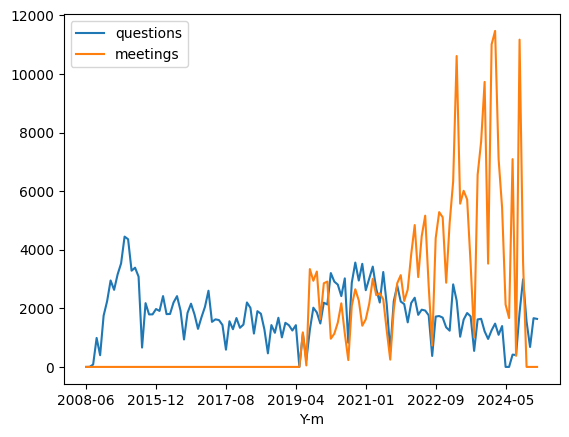

In [69]:
df_ = (
    df.reset_index()
    .groupby("Y-m")
    .agg({"meetings": "sum", "questions": "sum"})
    .sort_values("Y-m")
)


df_[["questions", "meetings"]].plot()

Como há problemas na captação dos dados de reuniões antes de 2019-07  e 2024-11

Remover esses pontos fora do intervalo

In [70]:
df_filtered = df.loc[
    (df["Y-m"] > "2019-07")
    & (df["Y-m"] < "2024-11")
]


<Axes: xlabel='Y-m'>

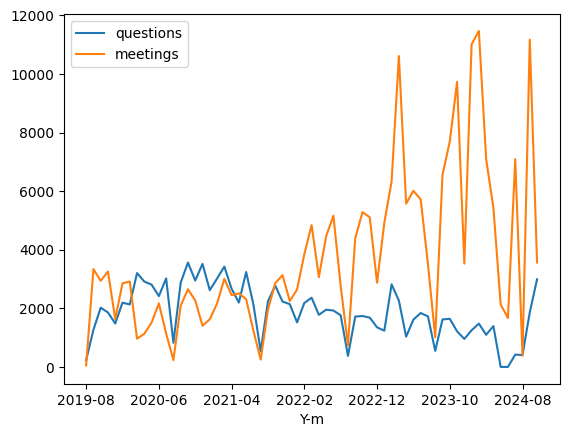

In [71]:
df_ = (
    df_filtered.reset_index()
    .groupby("Y-m")
    .agg(
        {
            "meetings": "sum",
            "questions": "sum"
        }
    )
    .sort_values("Y-m")
)

df_[["questions", "meetings"]].plot()

In [79]:
df_filtered.fillna(0).to_csv("./data/gold/df_long_v2.csv")


In [78]:
df_filtered[df_filtered['meps_party'].isna()].groupby("Y-m").agg({"questions": "sum", "meetings": "sum"}).join(df_filtered.groupby("Y-m").agg({"questions": "sum", "meetings": "sum"}), rsuffix="_all")

,questions,meetings,questions_all,meetings_all
Y-m,,,,
2019-08,94.0,21.0,231.0,52.0
2019-09,285.0,1003.0,1264.0,3339.0
2019-10,380.0,730.0,2021.0,2940.0
2019-11,411.0,1051.0,1859.0,3256.0
2019-12,292.0,446.0,1482.0,1632.0
2020-01,494.0,818.0,2192.0,2855.0
2020-02,431.0,685.0,2132.0,2913.0
2020-03,617.0,274.0,3203.0,963.0
2020-04,676.0,324.0,2912.0,1133.0
